In [1]:
from netCDF4 import Dataset, date2num, num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mplticker
import matplotlib.colors as colors
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.dates as mdates
import string
import datetime as dt
import cftime as cf

from scipy import stats

%matplotlib inline

In [2]:
fldLoc = '/pscratch/sd/s/srai/nccs/runGeos7dayAvg/test_7dayAvg_NanLand_test/'

gridFile = 'input/tripoleGridCreated.nc'
maskFile = 'input/RegionMasks.nc'
kmtSatFile = 'input/kmtSatToCESM.nc'

gridDS= Dataset(fldLoc + gridFile)
kmtDS = Dataset(fldLoc + kmtSatFile)
KMT = 1-np.roll(np.array(kmtDS.variables['KMTsat']), 1800, axis=1)
UAREA = np.array(gridDS.variables['UAREA'])
ULAT = np.array(gridDS.variables['ULAT'])
ULONG = np.array(gridDS.variables['ULONG'])
landMask = KMT < 1

In [3]:
rotFile = 'Output/100km_smth/avgNLMonPosAndNegVort_0100km.nc'
strFile = 'Output/100km_smth/avgNLMon45degAndMinus45degStrain_0100km.nc'
TS_File = 'Output/100km_smth/NLMrotAndNLMstrLatBandSeries_0100km.nc'  #time series file
okubo_File = 'Output/100km_smth/avgOkuboWeissAndStrainDirec_0100km.nc'

rotDS = Dataset(fldLoc + rotFile)
strDS = Dataset(fldLoc + strFile)
timeSeriesDS = Dataset(fldLoc + TS_File)
okuboDS = Dataset(fldLoc + okubo_File)

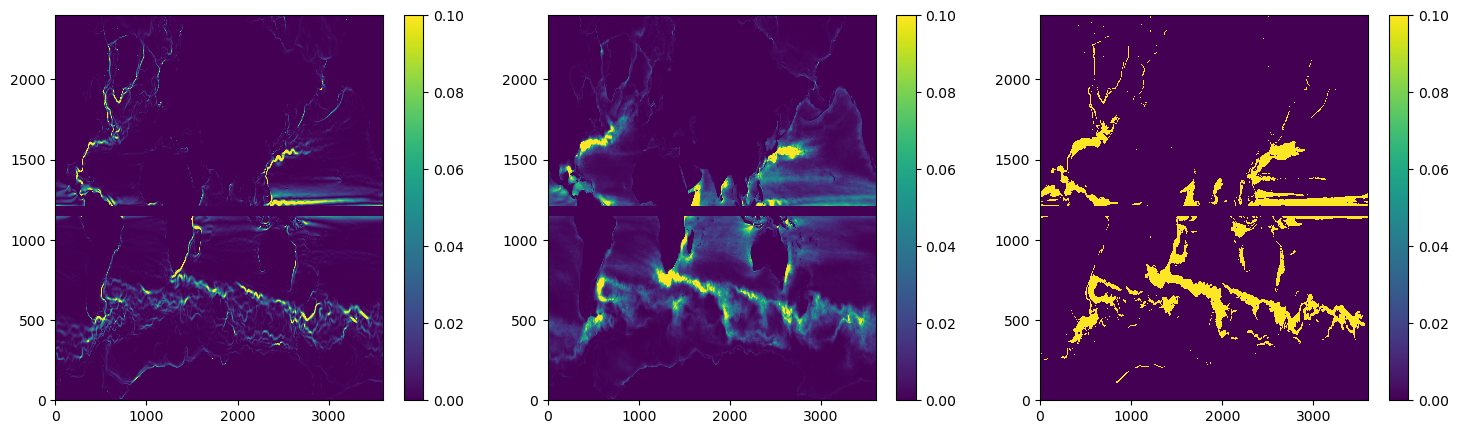

In [4]:
keAndEkeFile = fldLoc + 'input/KEandEKE_pop.nc'
keDS = Dataset(keAndEkeFile)
KE = np.array(keDS.variables['KE'][:,:])/10000
EKE = np.array(keDS.variables['EKE'][:,:])/10000
keDS.close()

fig, axes = plt.subplots(1,3, figsize=(18,5))

v1= 0.0
v2 = 0.1


ax = axes[0]
pmesh = ax.pcolormesh(KE,vmin=v1, vmax=v2)
plt.colorbar(pmesh, ax= ax)

ax = axes[1]
pmesh = ax.pcolormesh(EKE,vmin=v1, vmax=v2)
plt.colorbar(pmesh, ax= ax)


ax = axes[2]
pmesh = ax.pcolormesh((KE+EKE)>0.04,vmin=v1, vmax=v2)
plt.colorbar(pmesh, ax= ax)



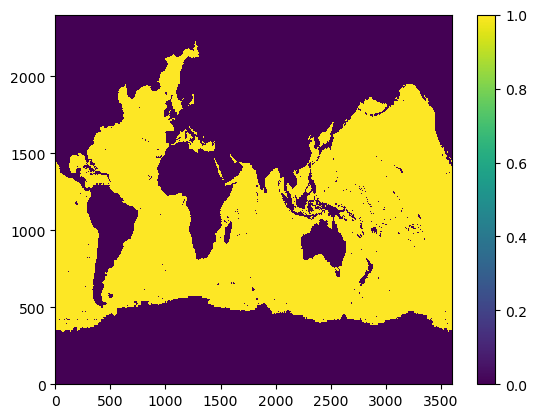

In [5]:
plt.pcolormesh(KMT)
plt.colorbar()

In [6]:
avg_posVortNLMrot = np.array(rotDS.variables['posVortNLMrot'][:,:])
avg_negVortNLMrot = np.array(rotDS.variables['negVortNLMrot'][:,:])

avg_posThetaNLMstr = np.array(strDS.variables['posThetaNLMstr'][:,:])
avg_negThetaNLMstr = np.array(strDS.variables['negThetaNLMstr'][:,:])

avg_posVortNLMrot[avg_posVortNLMrot == 0.0] =float('nan')
avg_negVortNLMrot[avg_negVortNLMrot == 0.0] =float('nan')
avg_posThetaNLMstr[avg_posThetaNLMstr == 0.0] =float('nan')
avg_negThetaNLMstr[avg_negThetaNLMstr == 0.0] =float('nan')

avg_posVortNLMrot[landMask] =float('nan')
avg_negVortNLMrot[landMask] =float('nan')
avg_posThetaNLMstr[landMask] =float('nan')
avg_negThetaNLMstr[landMask] =float('nan')

avg_curl_stress = np.array(okuboDS.variables['curl_stress'][:,:])*(0.1/0.01) ## changing to SI
avg_theta_tau = np.array(okuboDS.variables['theta1_tau'][:,:])

avg_curl_stress[0,landMask] =float('nan')
avg_theta_tau[0,landMask] =float('nan')

In [7]:
mask_20_40N = np.logical_and(ULAT>20, ULAT<40)
mask_5S_5N = np.logical_and(ULAT>-5, ULAT<5)
mask_15_40S = np.logical_and(ULAT>-40, ULAT<-15)


northMaskTitle = r'$20\degree N-40\degree N$'
southMaskTitle = r'$15\degree S-40\degree S$'
tropicTitle = r'$5\degree S-5\degree N$'


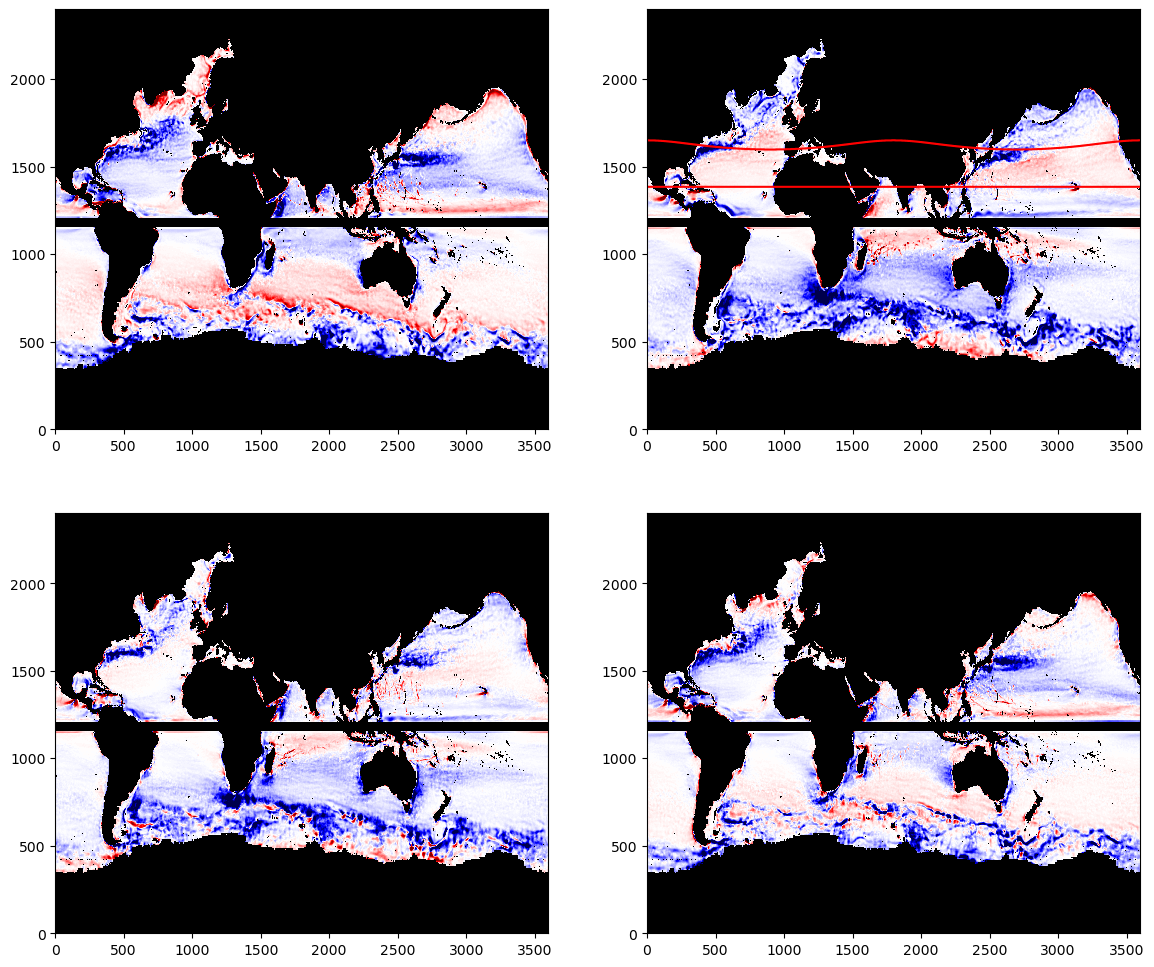

In [8]:
v = 0.25
cmap=plt.get_cmap('seismic').copy()
cmap.set_bad('k')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
ax = axes[0,0]
ax.pcolormesh(avg_posVortNLMrot, vmin=-v, vmax=v, cmap=cmap)
ax = axes[0,1]
ax.pcolormesh(avg_negVortNLMrot, vmin=-v, vmax=v, cmap=cmap)
ax.contour(mask_20_40N, colors='red')

ax = axes[1,0]
ax.pcolormesh(avg_posThetaNLMstr, vmin=-v, vmax=v, cmap=cmap)
ax = axes[1,1]
ax.pcolormesh(avg_negThetaNLMstr, vmin=-v, vmax=v, cmap=cmap)

In [9]:
np.min(avg_posVortNLMrot)

nan

In [10]:
avg_posVortNLMrot[2000,2000]

nan

In [11]:
timeSeriesDS.variables.keys()

dict_keys(['posThetaNLMstr_20_40N', 'negThetaNLMstr_20_40N', 'posVortNLMrot_20_40N', 'negVortNLMrot_20_40N', 'posThetaNLMstr_5S_5N', 'negThetaNLMstr_5S_5N', 'posVortNLMrot_5S_5N', 'negVortNLMrot_5S_5N', 'posThetaNLMstr_15_40S', 'negThetaNLMstr_15_40S', 'posVortNLMrot_15_40S', 'negVortNLMrot_15_40S'])

In [12]:
posThetaNLMstr_20_40N = np.array(timeSeriesDS.variables['posThetaNLMstr_20_40N'][:], dtype=float)
negThetaNLMstr_20_40N = np.array(timeSeriesDS.variables['negThetaNLMstr_20_40N'][:], dtype=float)

posVortNLMrot_20_40N = np.array(timeSeriesDS.variables['posVortNLMrot_20_40N'][:], dtype=float)
negVortNLMrot_20_40N = np.array(timeSeriesDS.variables['negVortNLMrot_20_40N'][:], dtype=float)

posThetaNLMstr_5S_5N = np.array(timeSeriesDS.variables['posThetaNLMstr_5S_5N'][:], dtype=float)
negThetaNLMstr_5S_5N = np.array(timeSeriesDS.variables['negThetaNLMstr_5S_5N'][:], dtype=float)

posVortNLMrot_5S_5N = np.array(timeSeriesDS.variables['posVortNLMrot_5S_5N'][:], dtype=float)
negVortNLMrot_5S_5N = np.array(timeSeriesDS.variables['negVortNLMrot_5S_5N'][:], dtype=float)

posThetaNLMstr_15_40S = np.array(timeSeriesDS.variables['posThetaNLMstr_15_40S'][:], dtype=float)
negThetaNLMstr_15_40S = np.array(timeSeriesDS.variables['negThetaNLMstr_15_40S'][:], dtype=float)

posVortNLMrot_15_40S = np.array(timeSeriesDS.variables['posVortNLMrot_15_40S'][:], dtype=float)
negVortNLMrot_15_40S = np.array(timeSeriesDS.variables['negVortNLMrot_15_40S'][:], dtype=float)

In [13]:
vortArr_15_40S = np.stack((posVortNLMrot_15_40S, negVortNLMrot_15_40S), axis = 0)
vortArr_20_40N = np.stack((posVortNLMrot_20_40N, negVortNLMrot_20_40N), axis = 0)
vortArr_5S_5N = np.stack((posVortNLMrot_5S_5N, negVortNLMrot_5S_5N), axis = 0)

strArr_15_40S = np.stack((posThetaNLMstr_15_40S, negThetaNLMstr_15_40S), axis = 0)
strArr_20_40N = np.stack((posThetaNLMstr_20_40N, negThetaNLMstr_20_40N), axis = 0)
strArr_5S_5N = np.stack((posThetaNLMstr_5S_5N, negThetaNLMstr_5S_5N), axis = 0)

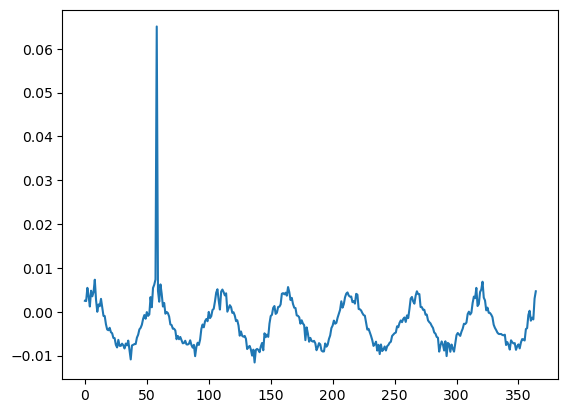

In [14]:
plt.plot(posVortNLMrot_5S_5N)

In [15]:
def plt2d(ax, pltArr, d, cmap, cbTitle, txt, figLabel, cb=True, extd='both', pltReturn=False):
    m = ax.pcolormesh(pltArr, vmin=-d, vmax=d, cmap=cmap, rasterized=True)
    if cb:
        cb = plt.colorbar(m, ax=ax, extend=extd)
        cb.ax.tick_params(labelsize=12)
        if extd == 'both':
            p = 20
        else:
            p = 10
        cb.ax.set_title(cbTitle, size=12, pad = p)

    xpos = 0.6
    ypos = 0.85
    fsize = 18

    ax.text(xpos, ypos, txt, horizontalalignment='center', fontweight = 'heavy',  color ='white' ,
                        verticalalignment='center', transform=ax.transAxes, fontsize=fsize)

    xpos, ypos = 0.1, 0.85
    ax.text(xpos, ypos, figLabel, horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, 
            fontsize = 18, weight='heavy', color='white')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    if pltReturn:
        return m
    
def getRunAvg(array1D, ksize):
    ndays = len(array1D)
    
    ksize = 13
    half_ksize = ksize//2
    kernel = np.ones((ksize,), dtype=float)/ksize
    

    runAvg = np.convolve(array1D, kernel, mode='valid')
    lastindx = half_ksize+len(runAvg)
    
    plt_runAvg = np.ones((ndays), dtype =float) * float('nan')
    plt_runAvg[half_ksize:lastindx] = runAvg
    
    return plt_runAvg

def getCorrCoeffWithStdErr(arr1, arr2):
    coeff= np.corrcoef(arr1, arr2)[0, 1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(arr1, arr2)
    stdev_arr1 = np.std(arr1)
    stdev_arr2 = np.std(arr2)
    prob = 0.95
    Npoints = len(arr1)
    t_star = stats.t.cdf( 1 - (1-prob)/2, Npoints - 1 )
    std_err *= t_star *stdev_arr1/stdev_arr2
    return coeff, std_err
    
def plot_Trend(dates, array1DList, labelList, title, ax, showXticks=True):
    ndays = len(dates)
    
    narrs = len(array1DList)
    txt = '{0:s}\n'.format(title)
    
    pltArr = np.zeros((narrs, ndays), dtype =float)
    
    for i in range(narrs):
        pltArr[i,:] = getRunAvg(array1DList[i], 13)
        
    for i in range(1,narrs):
        r, stderr = getCorrCoeffWithStdErr(pltArr[0,:][~np.isnan(pltArr[0,:])], 
                                           pltArr[i,:][~np.isnan(pltArr[i,:])])
        if narrs<=2:
            txt += r'r = {0:>5.2f}$\pm${1:>4.2f}'.format(r, stderr)
        else:
            txt += r'r{0:d} = {1:>5.2f}$\pm${2:>4.2f}'.format(i,r, stderr)
    
    maxVals = []
    minVals = []
    for i in range(narrs):
        maxVals.append(np.nanmax(pltArr[i,:]))
        minVals.append(np.nanmin(pltArr[i,:]))
        ax.plot(dates, 
                pltArr[i,:], 
                rasterized = True, 
                label=labelList[i])
      
    
    maxy = max(maxVals)
    miny = min(minVals)
    
    diffy = maxy-miny

    ax.set_ylim([miny - 0.08 * diffy, (maxy + 0.5 * diffy)])

    ax.grid(visible=True, which='major', axis='both', linewidth=0.5, alpha = 0.5)
    ax.grid(visible=True, which='minor', axis='x', linewidth=0.1, alpha=0.2)
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_fmt)
    
    plt.setp(ax.yaxis.get_majorticklabels(), size=15)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=60, size=15)
    
    if showXticks==False:
        plt.setp(ax.get_xticklabels(), visible=False)
      
    ax.text(0.01, 1, txt, horizontalalignment='left', fontweight = 'heavy', 
                    verticalalignment='top', transform=ax.transAxes, fontsize=17)
    
    ax.legend(ncol = 2 , loc="upper right", fontsize = 14)


In [16]:
dateUnits = 'days since 0050-01-01 00:00:00'

ndays = 365

cfdates = num2date(7 * (np.arange(ndays) + 1) - 4, dateUnits)
strdates = ['{0:02d}/{1:02d}/{2:04d}'.format(d.month, d.day, d.year) for d in cfdates]
dates = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in strdates]

years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator(interval =4)  # every 4 month
months = mdates.MonthLocator(bymonth = (4,7,10))
#months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%b')

date_fmt = mdates.DateFormatter('%b %Y')

northMaskTitle = r'$20\degree N-40\degree N$'
southMaskTitle = r'$15\degree S-40\degree S$'
tropicTitle = r'$5\degree S-5\degree N$'

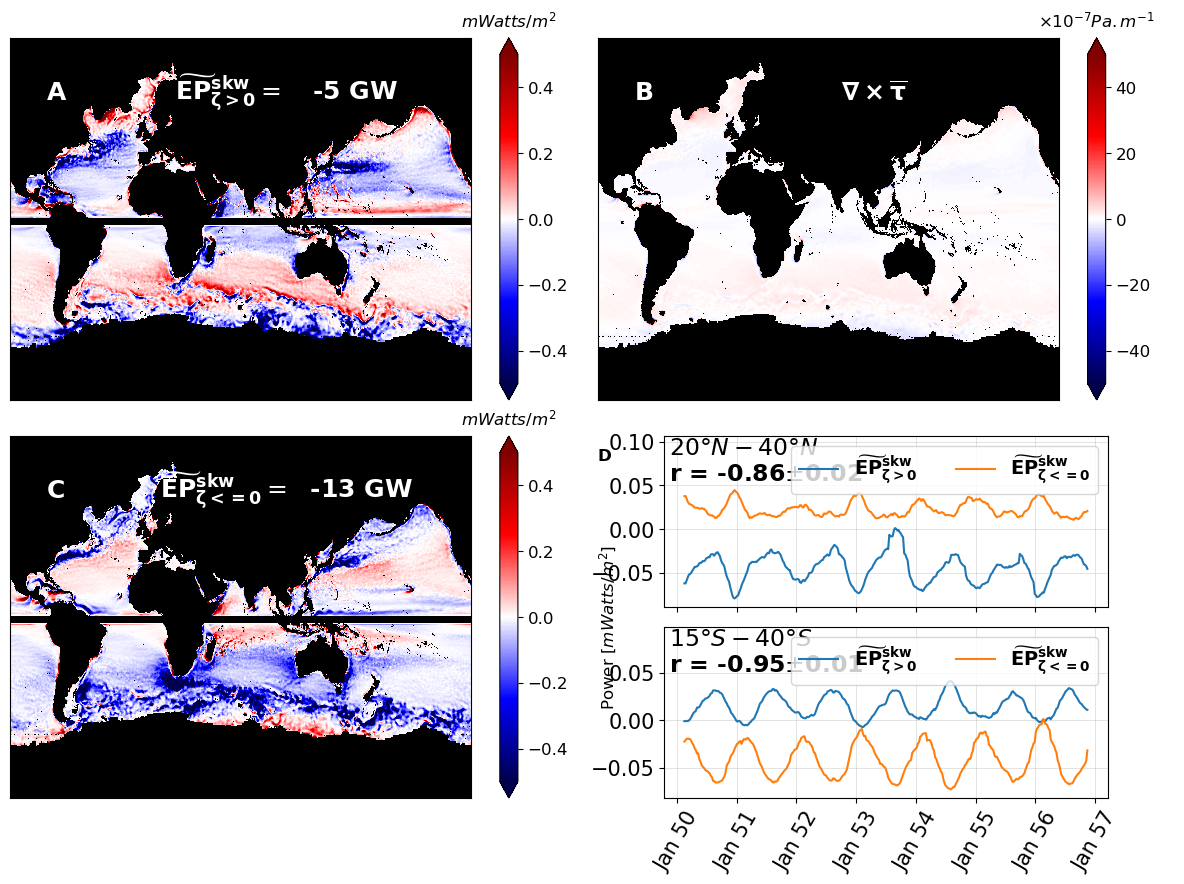

In [17]:
ratio = 2.578 #2.729

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('k')



##########################################################################
d = 0.5
ax = axes[0,0]
pltArr = avg_posVortNLMrot.copy() * ratio
txt = r'$\mathbf{\widetilde{EP}^{skw}_{\zeta>0}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'A')


###########################################################################
d = 50
ax = axes[0,1]
pltArr = avg_curl_stress[0,:,:].copy() * 1e7
txt = r'$\mathbf{\nabla\times\overline{\tau}}$'
cbTitle = r'$\times10^{-7} Pa.m^{-1}$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'B')



############################################################################
       
d = 0.5
ax =axes[1,0]

pltArr = avg_negVortNLMrot.copy() * ratio
cbTitle = r'$mWatts/m^2$'
txt = r'$\mathbf{\widetilde{EP}^{skw}_{\zeta<=0}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'C')


############################################################################
axes[1,1].remove()
ax1 = fig.add_subplot(2, 2, 4)

plot_Trend(dates, vortArr_15_40S * ratio, 
           [r'$\mathbf{\widetilde{EP}^{skw}_{\zeta>0}}$',r'$\mathbf{\widetilde{EP}^{skw}_{\zeta<=0}}$'], 
           southMaskTitle, ax1)#, showXticks=False )

divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(dates, vortArr_20_40N * ratio, 
           [r'$\mathbf{\widetilde{EP}^{skw}_{\zeta>0}}$',r'$\mathbf{\widetilde{EP}^{skw}_{\zeta<=0}}$'], 
           northMaskTitle, axB, showXticks=False )

ax0 = divider.append_axes("left", size="15%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=12, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'D', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 12, weight='heavy', color='k')

ax0.axis('off')

ax0_right = divider.append_axes("right", size="15%", pad=0.0)
ax0_right.axis('off')

############################################################################
plt.subplots_adjust(left=0.01, right=0.98, bottom=0.01, top = 0.96,hspace=0.1, wspace=0.02)
plt.savefig('NLM_zetaOrientationCESM.pdf', format='pdf', dpi=70)

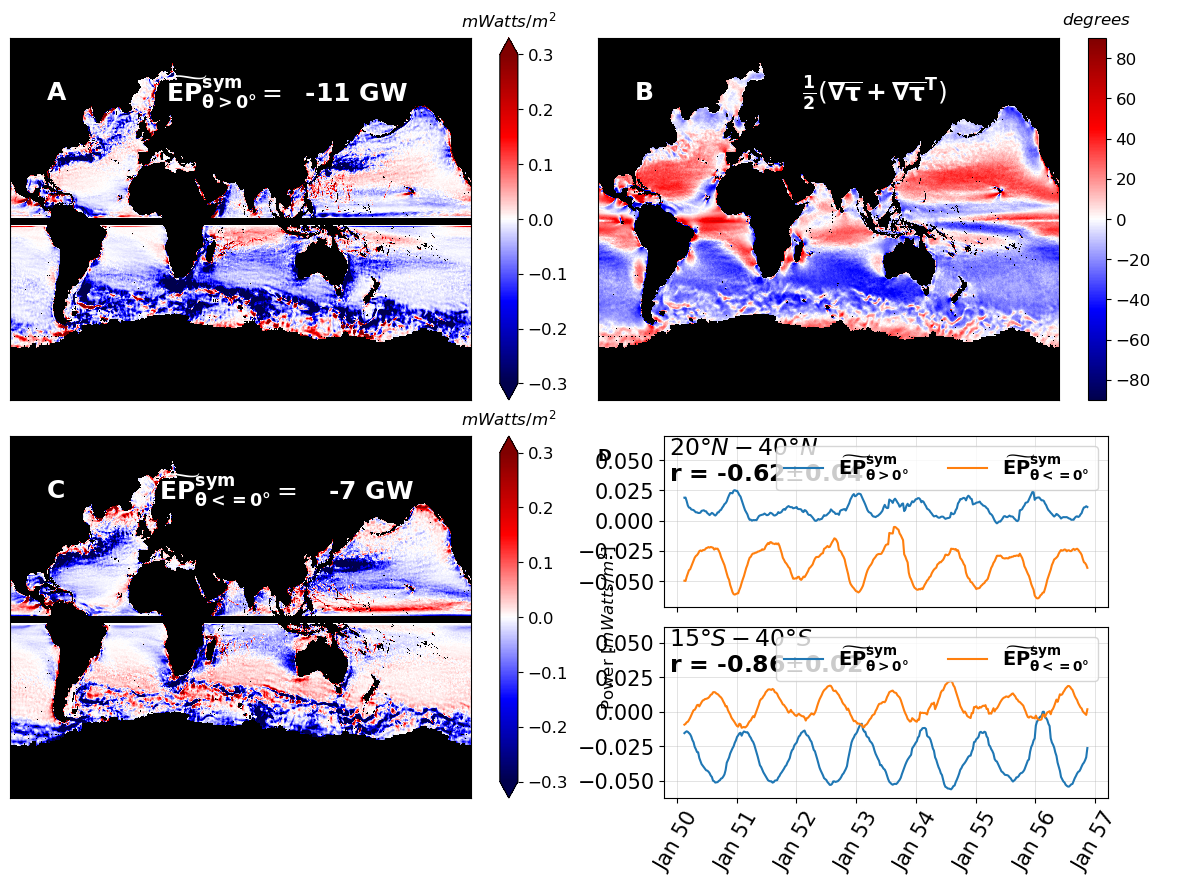

In [18]:
ratio = 2.578  #2.729

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('k')



##########################################################################
d = 0.3
ax = axes[0,0]
pltArr = avg_posThetaNLMstr.copy() * ratio
txt = r'$\mathbf{\widetilde{EP}^{sym}_{\theta>0\degree}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'A')


###########################################################################
d = 90
ax = axes[0,1]
pltArr = avg_theta_tau[0,:,:].copy()
txt = r'$\mathbf{\frac{1}{2}\left( \nabla\overline{\tau}+\nabla\overline{\tau}^T\right)}$'
cbTitle = r'$degrees$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'B', extd='neither')



############################################################################
       
d = 0.3
ax =axes[1,0]

pltArr = avg_negThetaNLMstr.copy() * ratio
cbTitle = r'$mWatts/m^2$'
txt = r'$\mathbf{\widetilde{EP}^{sym}_{\theta<=0\degree}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'C')


############################################################################
axes[1,1].remove()
ax1 = fig.add_subplot(2, 2, 4)

plot_Trend(dates, strArr_15_40S* ratio, 
           [r'$\mathbf{\widetilde{EP}^{sym}_{\theta>0\degree}}$',
            r'$\mathbf{\widetilde{EP}^{sym}_{\theta<=0\degree}}$'], 
           southMaskTitle, ax1)#, showXticks=False )

divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(dates, strArr_20_40N* ratio, 
           [r'$\mathbf{\widetilde{EP}^{sym}_{\theta>0\degree}}$',
            r'$\mathbf{\widetilde{EP}^{sym}_{\theta<=0\degree}}$'], 
           northMaskTitle, axB, showXticks=False )

ax0 = divider.append_axes("left", size="15%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=12, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'D', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 12, weight='heavy', color='k')

ax0.axis('off')

ax0_right = divider.append_axes("right", size="15%", pad=0.0)
ax0_right.axis('off')

############################################################################
plt.subplots_adjust(left=0.01, right=0.98, bottom=0.01, top = 0.96,hspace=0.1, wspace=0.02)
plt.savefig('NLM_strainOrientationCESM.pdf', format='pdf', dpi=70)

In [19]:
def showCommonColorbar(pmesh, cax, lim, cbUnits, 
                       greaterThan = True, lessThan = True,
                       orientation = 'vertical',
                       labelFormat = 'float',
                       aspect = 30, fraction = 1, padding = 25,
                       anchor = (0,0)):
    
    exp = int(np.log10(lim))
    if exp < 0: exp-=1    
    dlim = 2*lim/8
    tickList = list(np.arange(-lim, lim+dlim, dlim))

    if labelFormat == 'float':
        strTickList = ['{0:04.2f}'.format(x) for x in tickList]
    else:
        strTickList = ['{0:2.0f}'.format(x) for x in tickList]
    extd = 'neither'
    
    if greaterThan and lessThan:
        extd = 'both'
    elif greaterThan:
            extd = 'min'
    elif lessThan:
            extd = 'max'

    if greaterThan:
        strTickList[0] = '$<$' + strTickList[0]
    if lessThan:
        strTickList[-1] = '$>$' + strTickList[-1]
        
    cb = fig.colorbar(pmesh, cax = cax,
                      #ax=axList.ravel().tolist(), 
                      ticks=tickList, extend = extd, 
                      orientation = orientation)#,
                      #aspect = aspect, fraction = fraction, pad = pad,
                      #anchor = anchor)
    #cb = plt.colorbar(pmesh, ax=ax, ticks=tickList)
    #cbTitle = r'({0})$\times 10^{1}$'.format(cbUnits, '{'+str(exp)+'}' )   
    
    cbTitle = r'{0}'.format(cbUnits) 
    if orientation == 'vertical':
        cb.ax.set_yticklabels(strTickList)
        cb.ax.set_title(cbTitle, size=15, pad=padding)
    else:
        cb.ax.set_xticklabels(strTickList)
        cb.set_label(cbTitle, labelpad=-1, size=15)
    cb.ax.tick_params(labelsize=15)

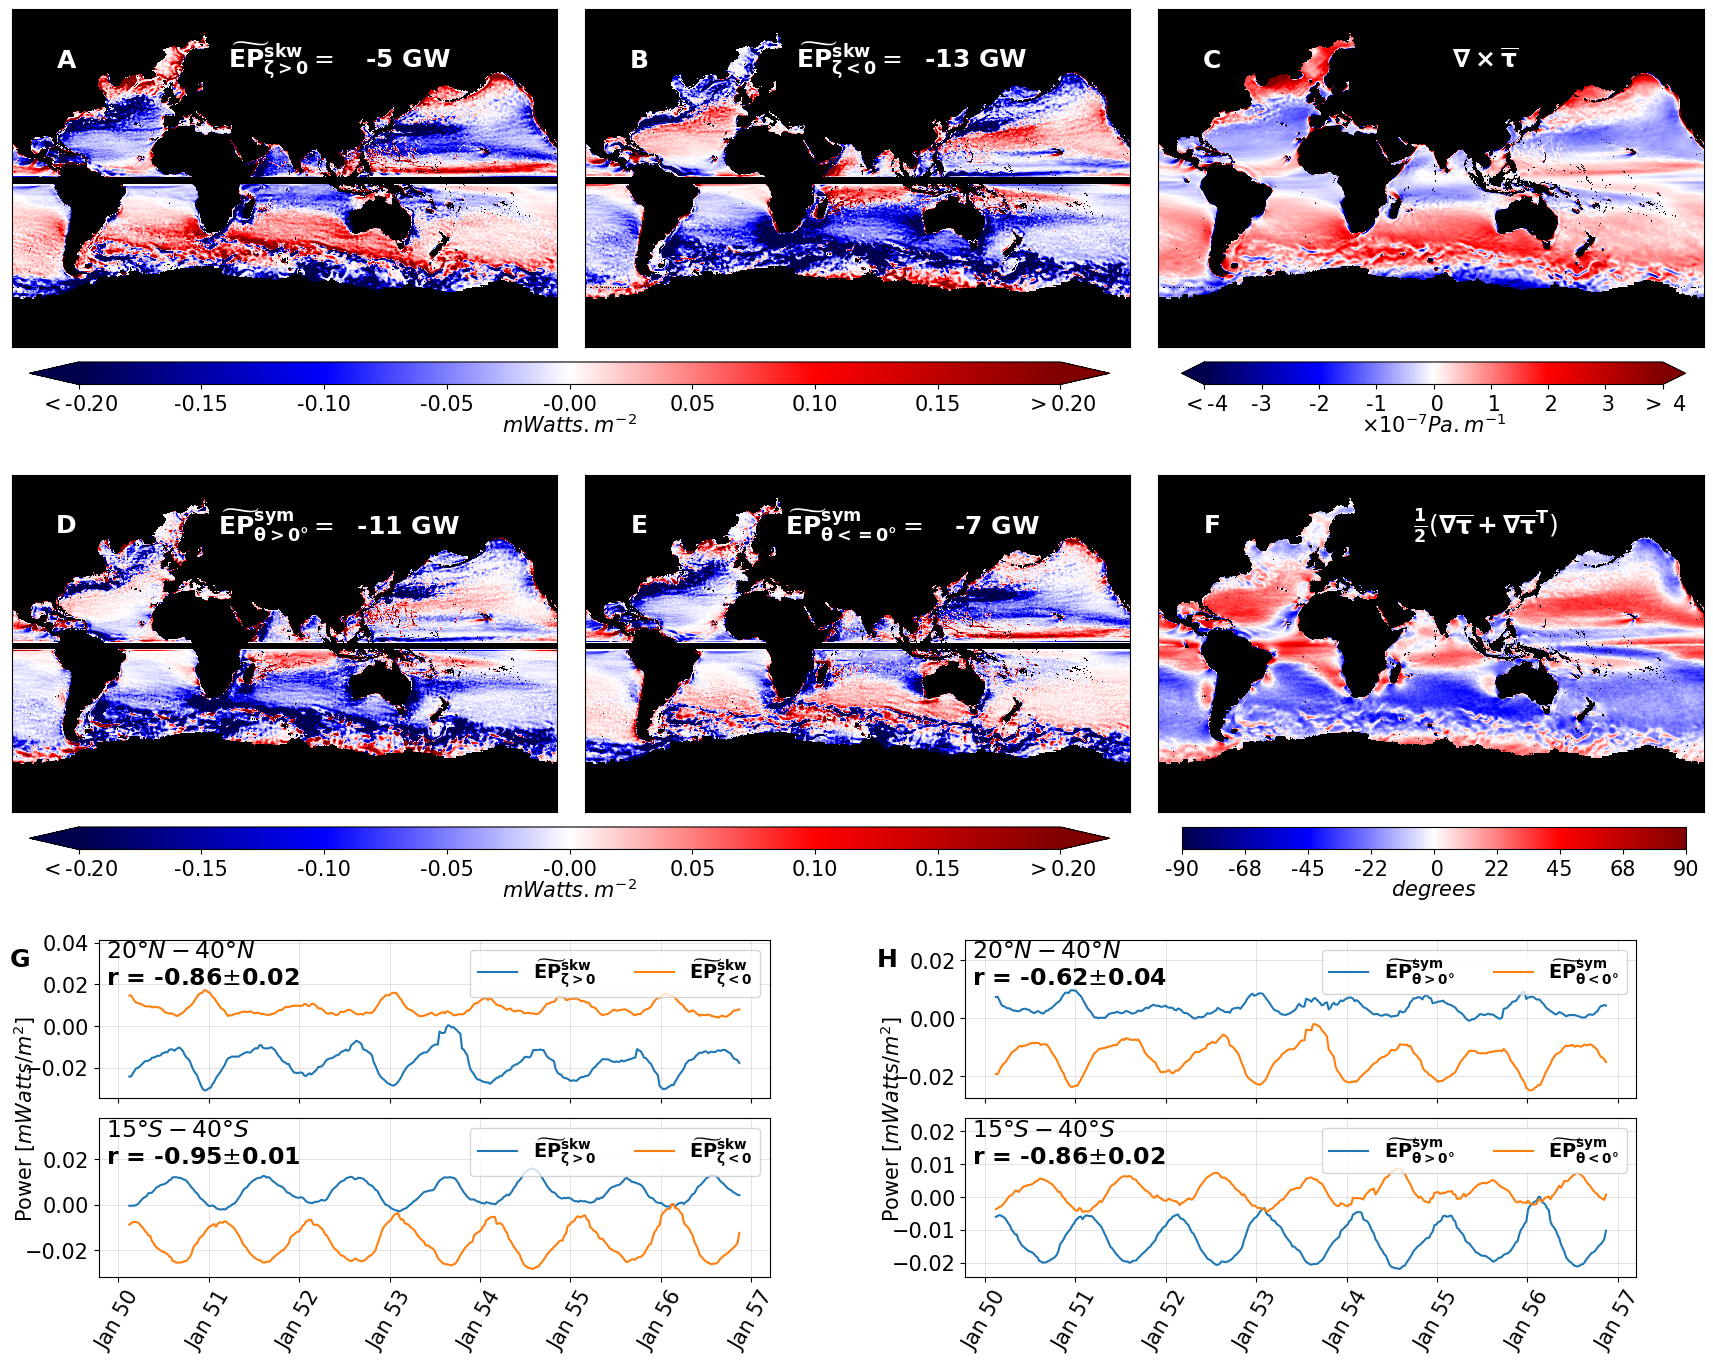

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (18,15))

cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('k')

limRow1 = 0.2
curlLim = 4

##########################################################################
d = limRow1
ax = axes[0,0]
pltArr = avg_posVortNLMrot.copy() * ratio
txt = r'$\mathbf{\widetilde{EP}^{skw}_{\zeta>0}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'A', cb=False, pltReturn=False)


###########################################################################

d = limRow1
ax = axes[0,1]
pltArr = avg_negVortNLMrot.copy() * ratio
txt = r'$\mathbf{\widetilde{EP}^{skw}_{\zeta<0}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
pmesh_top = plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'B', cb=False, pltReturn=True)

##########################################################

d = curlLim
ax = axes[0,2]
pltArr = avg_curl_stress[0,:,:].copy() * 1e7
txt = r'$\mathbf{\nabla\times\overline{\tau}}$'
curlStressCbTitle = r'$\times10^{-7} Pa.m^{-1}$'
pmesh_curl = plt2d(ax, pltArr, d, cmap, curlStressCbTitle, txt, 'C', cb=False, pltReturn=True)

# ##########################################################

startx, starty, dx, dy = 0.06, 0.68, 0.60, 0.015
cax = fig.add_axes([startx, starty, dx, dy]) 
showCommonColorbar(pmesh_top, cax, limRow1, '$mWatts.m^{-2}$', orientation='horizontal')

# ##########################################################

startx, starty, dx, dy = 0.70, 0.68, 0.28, 0.015
cax = fig.add_axes([startx, starty, dx, dy]) 
showCommonColorbar(pmesh_curl, cax, curlLim, curlStressCbTitle, 
                   labelFormat = 'int',orientation='horizontal')


##########################################################

limRow2 = 0.2

##########################################################################
d = limRow2
ax = axes[1,0]
pltArr = avg_posThetaNLMstr.copy() * ratio
txt = r'$\mathbf{\widetilde{EP}^{sym}_{\theta>0\degree}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
cbTitle = r'$mWatts/m^2$'
plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'D', cb=False, pltReturn=False)


###########################################################################
       
d = limRow2
ax =axes[1,1]

pltArr = avg_negThetaNLMstr.copy() * ratio
cbTitle = r'$mWatts/m^2$'
txt = r'$\mathbf{\widetilde{EP}^{sym}_{\theta<=0\degree}} = $' + '{0:5.0f} GW'.format(np.nansum(pltArr*UAREA*1e-7/1e9))
pmesh_bot = plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'E', cb=False, pltReturn=True)


############################################################################

d = 90
ax = axes[1,2]
pltArr = avg_theta_tau[0,:,:].copy()
txt = r'$\mathbf{\frac{1}{2}\left( \nabla\overline{\tau}+\nabla\overline{\tau}^T\right)}$'
cbTitle = r'$degrees$'
pmesh_symTau = plt2d(ax, pltArr, d, cmap, cbTitle, txt, 'F', cb=False, pltReturn=True)



############################################################################

# ##########################################################

startx, starty, dx, dy = 0.06, 0.37, 0.60, 0.015
cax = fig.add_axes([startx, starty, dx, dy]) 
showCommonColorbar(pmesh_bot, cax, limRow2, '$mWatts.m^{-2}$', orientation='horizontal')

# ##########################################################

startx, starty, dx, dy = 0.70, 0.37, 0.28, 0.015
cax = fig.add_axes([startx, starty, dx, dy]) 
showCommonColorbar(pmesh_symTau, cax, 90, r'$degrees$', 
                   labelFormat = 'int', greaterThan = False, lessThan = False, orientation='horizontal')

# #########################################################


axes[2,0].remove()
axes[2,1].remove()
axes[2,2].remove()
ax1 = fig.add_subplot(3, 2, 5)

plot_Trend(dates, vortArr_15_40S, 
           [r'$\mathbf{\widetilde{EP}^{skw}_{\zeta>0}}$',r'$\mathbf{\widetilde{EP}^{skw}_{\zeta<0}}$'], 
           southMaskTitle, ax1)#, showXticks=False )

divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(dates, vortArr_20_40N, 
           [r'$\mathbf{\widetilde{EP}^{skw}_{\zeta>0}}$',r'$\mathbf{\widetilde{EP}^{skw}_{\zeta<0}}$'], 
           northMaskTitle, axB, showXticks=False )

# axC = divider.append_axes("top", size="8%", pad=0.2)
# handles, labels = axB.get_legend_handles_labels()
# axC.legend(handles, labels, ncol = 2, loc=(0.35,0.0), fontsize=15)

# axC.axis('off')

ax0 = divider.append_axes("left", size="13%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=15, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'G', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 18, weight='heavy', color='k')

ax0.axis('off')

ax0_right = divider.append_axes("right", size="10%", pad=0.0)
ax0_right.axis('off')

# #########################################################

ax1 = fig.add_subplot(3, 2, 6)

plot_Trend(dates, strArr_15_40S, 
           [r'$\mathbf{\widetilde{EP}^{sym}_{\theta>0\degree}}$',r'$\mathbf{\widetilde{EP}^{sym}_{\theta<0\degree}}$'], 
           southMaskTitle, ax1)#, showXticks=False )

divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(dates, strArr_20_40N, 
           [r'$\mathbf{\widetilde{EP}^{sym}_{\theta>0\degree}}$',r'$\mathbf{\widetilde{EP}^{sym}_{\theta<0\degree}}$'], 
           northMaskTitle, axB, showXticks=False )

# axC = divider.append_axes("top", size="8%", pad=0.2)
# handles, labels = axB.get_legend_handles_labels()
# axC.legend(handles, labels, ncol = 2, loc=(0.35,0.0), fontsize=15)

# axC.axis('off')

ax0 = divider.append_axes("left", size="13%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=15, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'H', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 18, weight='heavy', color='k')

ax0.axis('off')

ax0_right = divider.append_axes("right", size="10%", pad=0.0)
ax0_right.axis('off')

#######################################

#######################################

#startx, starty, dx, dy = 0.66, 0.66, 0.015, 0.26
#cax = cax = ax[1,0:2] #fig.add_axes([startx, starty, dx, dy]) 
#showCommonColorbar(pmesh_bot, cax, limRow2, '$div mWatts.m^{-2}$')

# corr = np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1]
# print(corr, corr**2*100)

#######################################

plt.subplots_adjust(left=0.05, right=0.99, bottom=0.085, top = 0.93, wspace=0.05, hspace=0.38)
plt.savefig('imprintsOfWindsOnEPtilde.pdf', format='pdf', dpi=70)